# Superdense Coding Protocol

# Introduction

In this notebook, we use the Starmon-5 backend in Quantum Inspire to implement the superdense coding algorithm. With this quantum communication protocol, a sender (Bob) can transmit two classical bits of information to a receiver (Alice) using only one qubit. In addition, this method of communication is highly secure against eavesdropping since reading out the state during the communication will collapse the entangled state, indicating the presence of a third party listening.

### Procedure

We divide the superdense code into four main sections: initilization, encoding, decoding, measurement. Initially, Alice creates the entangled state and sends one qubit to Bob for the encoding step. After the encoding, Bob returns the qubit to Alice, who decodes the message and measures the two qubits. The measurement outcomes depend on the set of gates that Bob has applied during the encoding step (Table 1). 

After analyzing the main steps of the procedure, we create a function that runs the algorithm in the Quantum Inspire Starmon-5 backend. Finally, we analyze the data and present the results with and without implementing mid-circuit measurement tools (MCMs) (see previous notebook "Mid-circuit measurement tools").

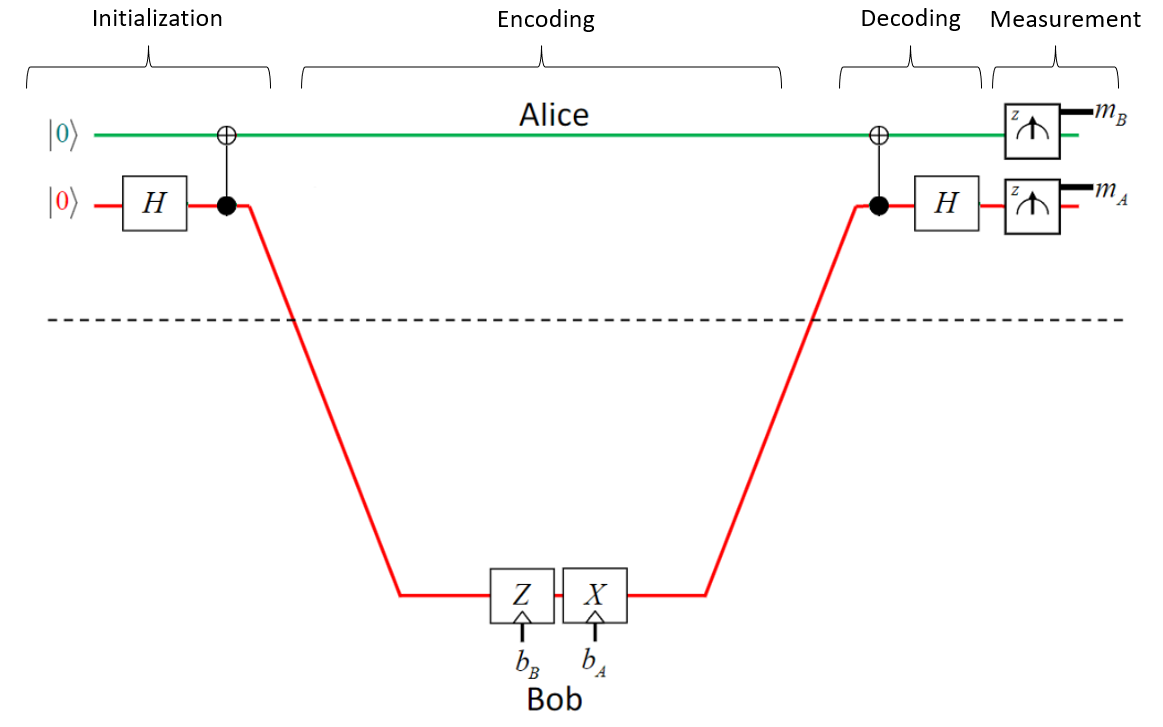
(**Figure 1.** Schematic of the superdense coding procedure. Alice prepares the qubits into a fully entangled state and sends one qubit to Bob. Bob encodes his message on the qubit state and sends the qubit back to Alice. Alice then decodes the state to obtain the message.)

## Step 1: Initialization (Alice)

The two qubits are initially prepared in the ground state, i.e., $|$<span style="color: red;">0</span><span style="color: green;">0</span>$\rangle$. Before sending the qubit to Bob, Alice needs to prepare an entangled state. So, Alice applies a H-gate to get $\frac{1}{\sqrt 2}( |$<span style="color: red;">0</span>$\rangle + |$<span style="color: red;">1</span>$\rangle)|$<span style="color: green;">0</span>$\rangle$, followed by a CNOT-gate, to obtain the desired entangled state $\frac{1}{\sqrt 2}(|$<span style="color: red;">0</span><span style="color: green;">0</span>$\rangle + |$<span style="color: red;">1</span><span style="color: green;">1</span>$\rangle)$. 

Now the <span style="color: red;">qubit</span> is ready to be sent to Bob, who encodes the two classical bits of information.

## Step 2: Encoding (Bob)
Bob can choose between four gates to apply to the <span style="color: red;">qubit</span>. Each gate will encode a different message for Alice. The four different possibilities are listed in the table below.

(**Table 1**. Here, we show the different single qubit gates that Bob can apply to the qubit with the resulting classical message.) 

|   Gates     | Classical Message     |
|:-----------:|:-----------------------:|
|    I        |             00        |
|    X        |             01        |
|    Z        |             10        |
|    ZX       |             11        |


A different Bell state will be encoded for each gate that Bob applies to the qubit. After decoding, each Bell state will result in a different 2-bit message. Remember that the Identity gate doesn't alter the state, and the X and Z gates make the qubit do a $\pi$-rotation over their respective axes.

The different possible states after encoding will then be:

<font size="3"> 
<span style="color: red;">I</span> $\frac{1}{\sqrt 2}$($|$<span style="color: red;">0</span><span style="color: green;">0</span>$\rangle + |$<span style="color: red;">1</span><span style="color: green;">1</span>$\rangle$) = $\frac{1}{\sqrt 2}$($|$<span style="color: red;">0</span><span style="color: green;">0</span>$\rangle + |$<span style="color: red;">1</span><span style="color: green;">1</span>$\rangle$)

<span style="color: red;">X</span> $\frac{1}{\sqrt 2}$($|$<span style="color: red;">0</span><span style="color: green;">0</span>$\rangle + |$<span style="color: red;">1</span><span style="color: green;">1</span>$\rangle$) = $\frac{1}{\sqrt 2}$($|$<span style="color: red;">1</span><span style="color: green;">0</span>$\rangle + |$<span style="color: red;">0</span><span style="color: green;">1</span>$\rangle$)

<span style="color: red;">Z</span> $\frac{1}{\sqrt 2}$($|$<span style="color: red;">0</span><span style="color: green;">0</span>$\rangle + |$<span style="color: red;">1</span><span style="color: green;">1</span>$\rangle$) = $\frac{1}{\sqrt 2}$($|$<span style="color: red;">0</span><span style="color: green;">0</span>$\rangle - |$<span style="color: red;">1</span><span style="color: green;">1</span>$\rangle$)

<span style="color: red;">ZX</span> $\frac{1}{\sqrt 2}$($|$<span style="color: red;">0</span><span style="color: green;">0</span>$\rangle + |$<span style="color: red;">1</span><span style="color: green;">1</span>$\rangle$) = $\frac{1}{\sqrt 2}$($-|$<span style="color: red;">1</span><span style="color: green;">0</span>$\rangle + |$<span style="color: red;">0</span><span style="color: green;">1</span>$\rangle$)

The state can now be sent back to Alice, who can decode Bob's message.

## Step 3: decoding (Alice)

After the encoding step, Bobs sends the <span style="color: red;">qubit</span> back to Alice. To decode the message, Alice applies a CNOT-gate followed by a H-gate, see Figure 1. The decoding of the '11' message is:

<span style="color: red;">H </span>$\cdot$ **CNOT** $\frac{1}{\sqrt 2}$($-|$<span style="color: red;">1</span><span style="color: green;">0</span>$\rangle + |$<span style="color: red;">0</span><span style="color: green;">1</span>$\rangle$) = $ |$<span style="color: red;">1</span><span style="color: green;">1</span>$\rangle$

The states after the different respective gate operations are listed in Table 1. The circuit in Figure 2 shows the implementation of the superdense code in Quantum Inspire, in the case of the '11' message.

# Superdense code in Quantum Inspire

The figure below shows the Quantum Inspire circuit implementation for the ZX gate. 

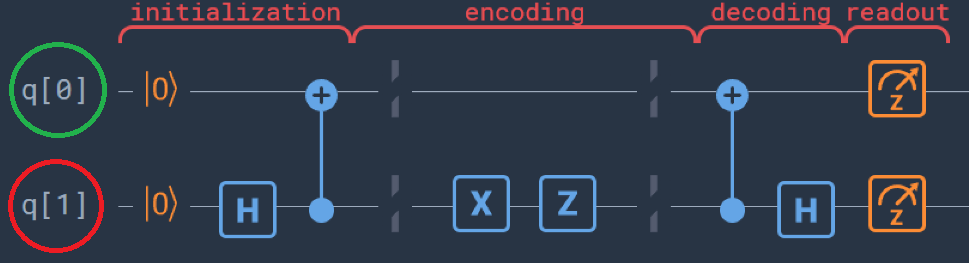
(**Figure 2.** Superdense code implemented in Quantum Inspire)

### Reducing circuit depth

The longer the circuit depth, the greater the probability that a qubit's relaxation and/or dephasing event occurs. So, to reduce the run time, we want to obtain the same final state with the least amount of gates possible. In this way, we can get higher fidelities.

First, we decompose each gate in this procedure to native gates for Quantum Inspire. In particular, we use the following circuit transformation (Figure 3).

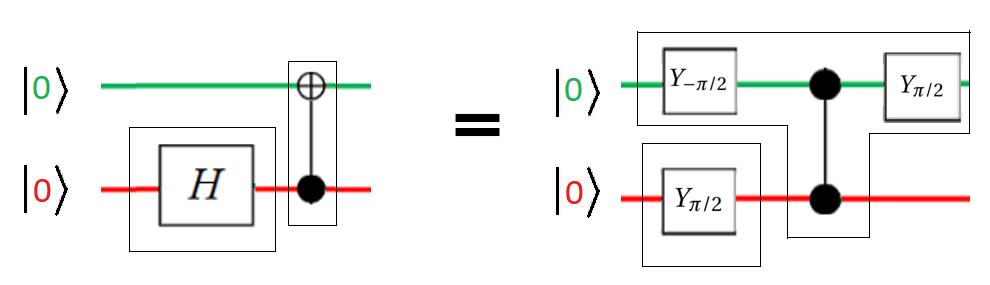
(**Figure 3.** H and CNOT gate decomposition and optimization. Method of rewriting Hadamard and CNOT gate when qubits are initialized in $|0\rangle$)

Additionally, notice that the X and Z-gate together form a Y-gate (these two rotations effectively form a rotation along the Y-axis). The circuit now becomes the following (Figure 4):

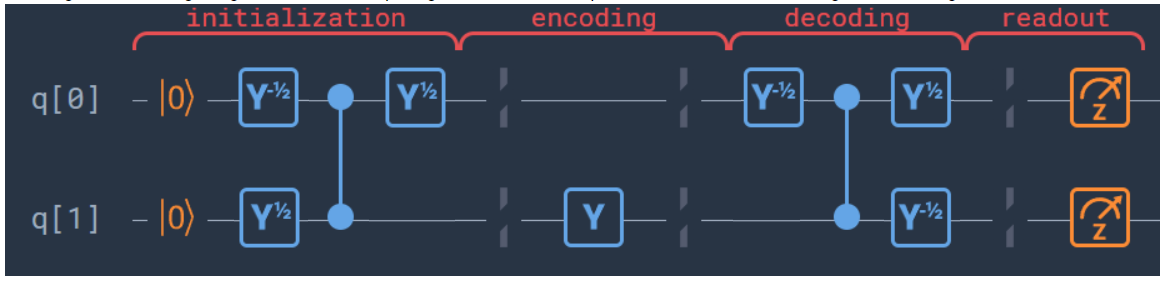
(**Figure 4.** Circuit from Figure 3 implemented in the circuit of Figure 2)

We can now make this code more time-efficient by rewriting and reducing some of the steps: The Y-rotations done on q[0] in the picture above cancel each other out. Removing these rotations gives us the circuit in Figure 5:

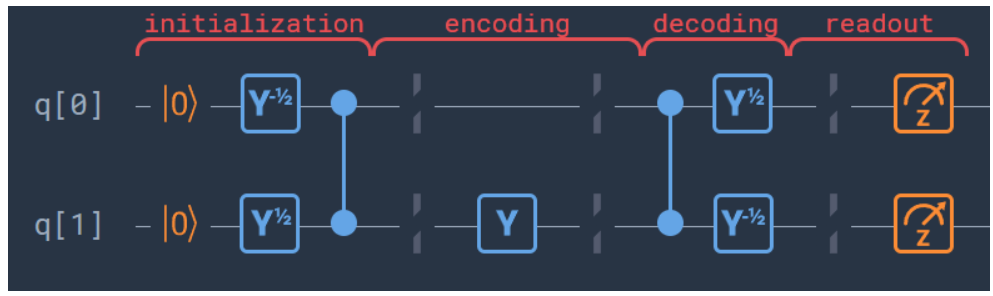
(**Figure 5.** Reduced circuit from Figure 4)

In [1]:
from UtilityFunctions import *

save_account('write your token here')
DataPath = NewDay()

## Algorithm implementation
In the following code, *qubitA* will be <span style="color: red;">$q[1]$</span> from the above sections, *qubitB* is the other qubit in the procedure.
To communicate with the backend, we will create a function that can do this for us. In this function, all the steps described above are executed. With only one job, we run all the possible encoded messages (TV mode), meaning we can extract all the fidelities simultaneously. This increases the duty cycle of data acquisition.

We use 10,000 shots (executions of the algorithm) in this process. Doing more can lead to the system crashing.

You can find the utility functions that we use below to create the local directory and save the data in the public
GitHub repository: https://github.com/DiCarloLab-Delft/QuantumInspireUtilities/tree/main

In [40]:
maxShots = 10000

def Superdense(qubitB: int = 0, qubitA: int= 0, suffix: str="", shots: int = maxShots, backend: int=1):
    basename='Superdense_code_TV'
    histname, cqasmname, rawname = PrepFile(basename, suffix, doraw = 1)   

    for k in tqdm(range(1), desc=histname):
        index=2**(2);
        qasm_string = """
            version 1.0
            qubits 5
            """
        
        for i in range(4):
            if i == 0:
                gate = 'I'
            elif i == 1:
                gate = 'X'
            elif i == 2:
                gate = 'Z'
            elif i == 3:
                gate = 'Y'
             
            qasm_string += """
                barrier q[0:4]
                prep_z q[{qubitB},{qubitA}]
                measure_z q[{qubitB},{qubitA}]
                barrier q[0:4]

                {{ Y90 q[{qubitA}] | mY90 q[{qubitB}] }}

                CZ q[{qubitB}], q[{qubitA}]

                barrier q[0:4]

                {gate} q[{qubitA}]

                barrier q[0:4]

                CZ q[{qubitB}], q[{qubitA}]
                {{ mY90 q[{qubitA}] | Y90 q[{qubitB}] }}

                measure_z q[{qubitB},{qubitA}]
                measure_z q[{qubitB},{qubitA}]
                measure_z q[{qubitB},{qubitA}]
                """.format(qubitB = qubitB, qubitA = qubitA, gate = gate)

        results = API_RunAndSave(1, qasmprog=qasm_string, histname=histname, cqasmname = cqasmname, shots=shots, backend=backend, lastonly = 0, getresults = 1)
        API_SaveRawData(results, 1, rawname)
    return

## Implementation of MCMs
To improve the fidelity and reduce the measurement errors as much as possible, we implement MCMs in the code. In particular, we use post-selection (PS) and maximum-likelihood 3 readout (ML3 RO).

The circuit below shows the superdense coding circuit with the implementation of MCMs tools. 
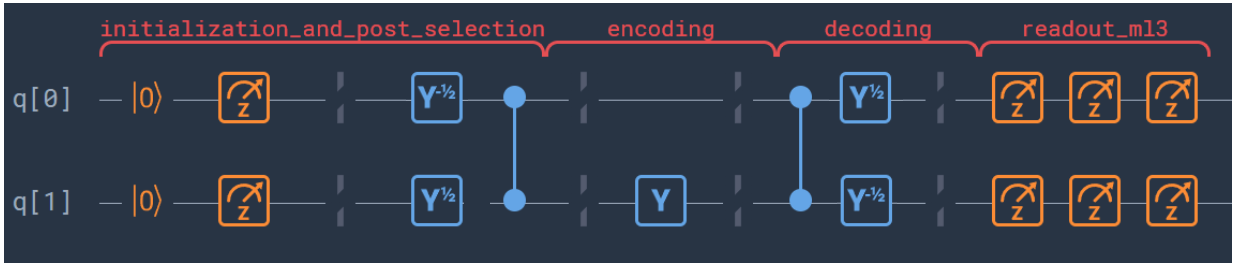
(**Figure 6.** Mid-circuit measurements implemented in the superdense coding circuit.)

In [3]:
# Choose the qubits to use in the algorithm
qubitA = 2
qubitB = 3

# Function excecution
rep = 2 # how many consecutive times you want to run the job?

for j in range(rep):
    suffix = 'SDC_{}'.format(j)
    Superdense(qubitB = qubitB, qubitA = qubitA, shots = maxShots, suffix=suffix)

In [6]:
# Importing the data
bins_sliced = []

for i in range(rep):
    filedata = os.path.join(DataPath, 'Hist_Superdense_code_TV_SDC'+'_{}'.format(i)+'_API.txt')
    foldername_bins = os.path.join(DataPath, 'Raw_'  + filedata[112:-4]) # you may need to change the indices in filedata to have the correct file name 
    filename_bins = os.path.join(foldername_bins,'Raw_'  + filedata[112:-4] + '_1.csv') # you may need to change the indices in filedata to have the correct file name 
    bins_loaded = np.loadtxt(filename_bins, delimiter=',', skiprows=1, dtype='str') #load all output bins into an array
    for j in range(len(bins_loaded)):
        bins_sliced.append(bins_loaded[j][1:])
        
print('total measurements:',len(bins_sliced))

total measurements: 20000


## Post-selection
**If MCMs is set to 1 the Mid-circuit measurement tools are used for the data-processing**

In [7]:
def post_selection(bins_sliced, MCM):

    selec = []
    if MCM == 1:
        for i in range(len(bins_sliced)):
            if bins_sliced[i][0][-qubitB-2] == '1' or bins_sliced[i][0][-qubitA-2] == '1':
                pass
            elif bins_sliced[i][4][-qubitB-2] == '1' or bins_sliced[i][4][-qubitA-2] == '1':
                pass
            elif bins_sliced[i][8][-qubitB-2] == '1' or bins_sliced[i][8][-qubitA-2] == '1':
                pass       
            elif bins_sliced[i][12][-qubitB-2] == '1' or bins_sliced[i][12][-qubitA-2] == '1':
                pass
            else: selec.append(bins_sliced[i])
        print("from:",len(bins_sliced),"shots,", len(bins_sliced)-len(selec), "are removed due to post-selection", "(",np.round(100*(len(bins_sliced)-len(selec))/len(bins_sliced), 3),"%)")


    if MCM != 1:
        selec = bins_sliced
    return selec

print('With MCM:')
selec_MCM = post_selection(bins_sliced,MCM = 1)
selec_ML1 = post_selection(bins_sliced,MCM = 0)

With MCM:
from: 20000 shots, 1487 are removed due to post-selection ( 7.435 %)


## Raw data analysis and post-selection

When using ML1 RO, the next step is simply determining if the measurement outcome is 0 or 1. If the ML3 RO approach is used, we consider the three measurements, and based on where the threshold lays, we get the measurement outcome.

In [8]:
# The threshold value i updated with the realtime treshold for each qubit
i0,i1,i2,i3,i4 = 3,3,3,3,3
tres_array = np.array([i0,i1,i2,i3,i4])

iB = tres_array[qubitB]
iA = tres_array[qubitA]

def ML3_procedure(selec,MCM):
    freqs = np.zeros((4,4))
    
    for i in range(len(selec)):

        for j in range(1,16,4):

            if j == 1: 
                k = 0
            elif j == 5: 
                k = 1
            elif j == 9: 
                k = 2
            elif j == 13: 
                k = 3
            bitB = '0'
            bitA = '0'

            if MCM == 1:                 
                stringB = '{m0}{m1}{m2}'.format(m0 = selec[i][j][-qubitB-2], m1 = selec[i][j+1][-qubitB-2], m2 = selec[i][j+2][-qubitB-2])     
                if int(stringB,2) >= iB:             
                    bitB = '1'

                stringA = '{m0}{m1}{m2}'.format(m0 = selec[i][j][-qubitA-2], m1 = selec[i][j+1][-qubitA-2], m2 = selec[i][j+2][-qubitA-2])
                if int(stringA,2) >= iA:
                    bitA = '1'

                bit_mess = ''.join([bitA,bitB])
                freqs[k][int(bit_mess,2)] += 1

            if MCM != 1:  
                stringB = '{m0}'.format(m0 = selec[i][j][-qubitB-2])
                if stringB == '1':                  
                    bitB = '1' 
                stringA = '{m0}'.format(m0 = selec[i][j][-qubitA-2])
                if stringA == '1':
                    bitA = '1'

                bit_mess = ''.join([bitA,bitB])
                freqs[k][int(bit_mess,2)] += 1
                    
                
    bins = ''.join([bitA,bitB])
    return freqs, bins

freqs_MCM, bins_MCM = ML3_procedure(selec_MCM,1)
freqs_ML1, bins_ML1 = ML3_procedure(selec_ML1,0)

probabilities00_MCM = freqs_MCM[0]/np.sum(freqs_MCM[0])
probabilities01_MCM = freqs_MCM[1]/np.sum(freqs_MCM[1])
probabilities10_MCM = freqs_MCM[2]/np.sum(freqs_MCM[2])
probabilities11_MCM = freqs_MCM[3]/np.sum(freqs_MCM[3])

probabilities00_ML1 = freqs_ML1[0]/np.sum(freqs_ML1[0])
probabilities01_ML1 = freqs_ML1[1]/np.sum(freqs_ML1[1])
probabilities10_ML1 = freqs_ML1[2]/np.sum(freqs_ML1[2])
probabilities11_ML1 = freqs_ML1[3]/np.sum(freqs_ML1[3])

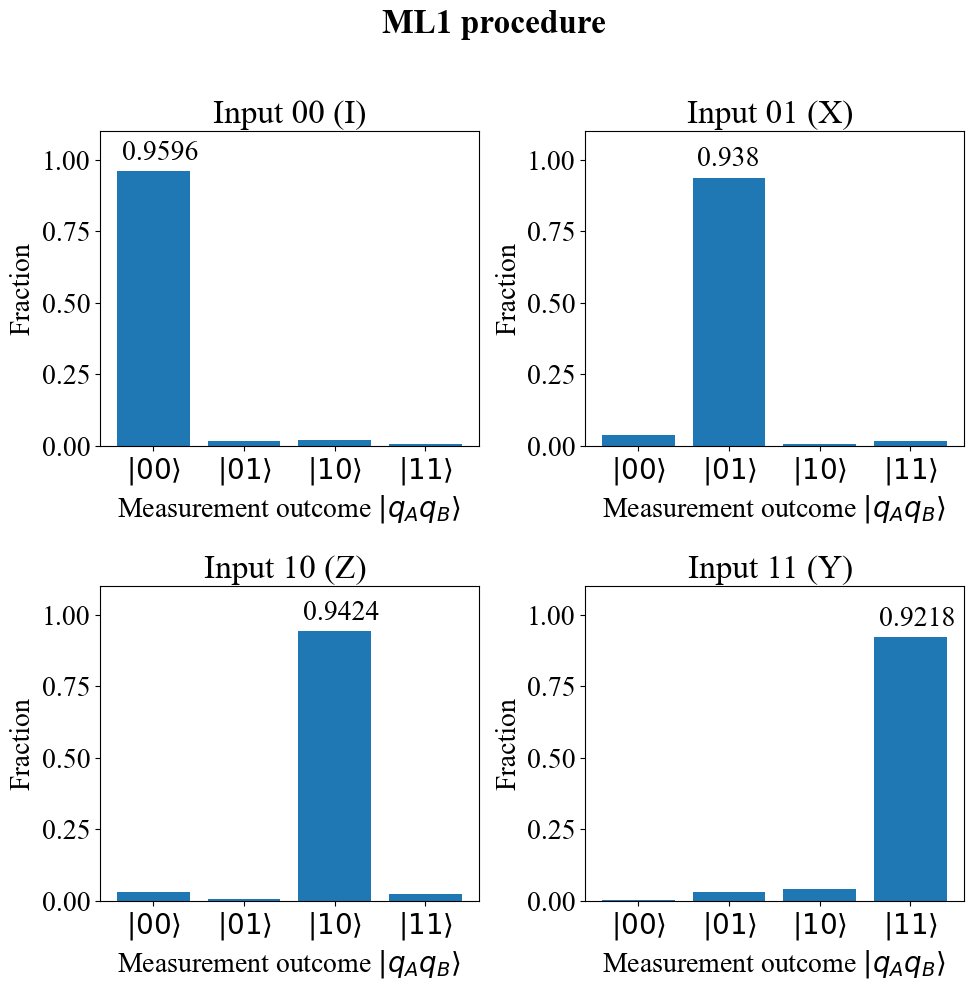

The mean fidelity (ML-1 RO) = 94.0412 %


In [9]:
#create strings for the states
bins = ['$|00\\rangle$','$|01\\rangle$','$|10\\rangle$','$|11\\rangle$']

#plot
font={'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 20}
plt.rc('font', **font)

#plotting
indices = np.array([0,1,2,3])
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

fig.suptitle('ML1 procedure', fontsize=24, fontweight='bold', y = 1.0)

# Plot for Input 00 fraction of shots
axs[0,0].annotate(str(np.round(probabilities00_ML1[indices[0]],4)), xy=(-0.35, probabilities00_ML1[indices[0]]+0.04))
axs[0,0].bar(bins, probabilities00_ML1[indices])
axs[0,0].set_title('Input 00 (I)')
axs[0,0].set_ylabel('Fraction')
axs[0,0].set_xlabel(r'Measurement outcome $|q_{A} q_{B}\rangle$')
axs[0,0].set_ylim(0,1.1)

# Plot for Input 01 fraction of shots
axs[0,1].annotate(str(np.round(probabilities01_ML1[indices[1]],4)), xy=(0.65, probabilities01_ML1[indices[1]]+0.04))
axs[0,1].bar(bins, probabilities01_ML1[indices])
axs[0,1].set_title('Input 01 (X) ')
axs[0,1].set_ylabel('Fraction')
axs[0,1].set_xlabel(r'Measurement outcome $|q_{A} q_{B}\rangle$')
axs[0,1].set_ylim(0,1.1)

# Plot for Input 10 fraction of shots
axs[1,0].annotate(str(np.round(probabilities10_ML1[indices[2]],4)), xy=(1.65, probabilities10_ML1[indices[2]]+0.04))
axs[1,0].bar(bins, probabilities10_ML1[indices])
axs[1,0].set_title('Input 10 (Z) ')
axs[1,0].set_ylabel('Fraction')
axs[1,0].set_xlabel(r'Measurement outcome $|q_{A} q_{B}\rangle$')
axs[1,0].set_ylim(0,1.1)

# Plot for Input 11 fraction of shots
axs[1,1].annotate(str(np.round(probabilities11_ML1[indices[3]],4)), xy=(2.65, probabilities11_ML1[indices[3]]+0.04))
axs[1,1].bar(bins, probabilities11_ML1[indices])
axs[1,1].set_title('Input 11 (Y) ')
axs[1,1].set_ylabel('Fraction')
axs[1,1].set_xlabel(r'Measurement outcome $|q_{A} q_{B}\rangle$')
axs[1,1].set_ylim(0,1.1)

plt.tight_layout()
plt.show()

fid_mean = np.mean([probabilities00_ML1[indices[0]],probabilities01_ML1[indices[1]],probabilities10_ML1[indices[2]],probabilities11_ML1[indices[3]]])
print('The mean fidelity (ML-1 RO) =', np.round(100*fid_mean,4), '%')

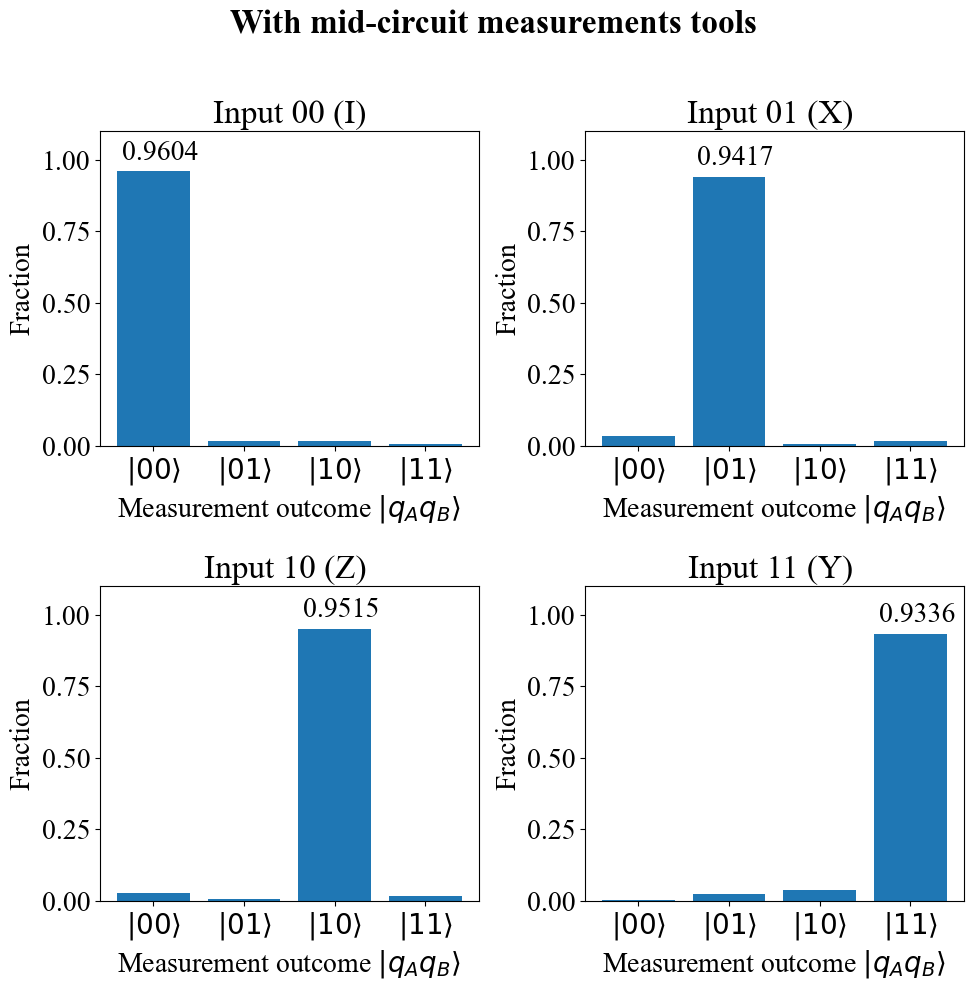

The mean fidelity (using MCMs) = 94.679 %


In [10]:
#plot
font={'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 20}
plt.rc('font', **font)

#plotting
indices = np.array([0,1,2,3])
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

fig.suptitle('With mid-circuit measurements tools', fontsize=24, fontweight='bold', y = 1.0
            )

# Plot for Input 00 fraction of shots
axs[0,0].annotate(str(np.round(probabilities00_MCM[indices[0]],4)), xy=(-0.35, probabilities00_MCM[indices[0]]+0.04))
axs[0,0].bar(bins, probabilities00_MCM[indices])
axs[0,0].set_title('Input 00 (I)')
axs[0,0].set_ylabel('Fraction')
axs[0,0].set_xlabel(r'Measurement outcome $|q_{A} q_{B}\rangle$')
axs[0,0].set_ylim(0,1.1)

# Plot for Input 01 fraction of shots
axs[0,1].annotate(str(np.round(probabilities01_MCM[indices[1]],4)), xy=(0.65, probabilities01_MCM[indices[1]]+0.04))
axs[0,1].bar(bins, probabilities01_MCM[indices])
axs[0,1].set_title('Input 01 (X) ')
axs[0,1].set_ylabel('Fraction')
axs[0,1].set_xlabel(r'Measurement outcome $|q_{A} q_{B}\rangle$')
axs[0,1].set_ylim(0,1.1)

# Plot for Input 10 fraction of shots
axs[1,0].annotate(str(np.round(probabilities10_MCM[indices[2]],4)), xy=(1.65, probabilities10_MCM[indices[2]]+0.04))
axs[1,0].bar(bins, probabilities10_MCM[indices])
axs[1,0].set_title('Input 10 (Z) ')
axs[1,0].set_ylabel('Fraction')
axs[1,0].set_xlabel(r'Measurement outcome $|q_{A} q_{B}\rangle$')
axs[1,0].set_ylim(0,1.1)

# Plot for Input 11 fraction of shots
axs[1,1].annotate(str(np.round(probabilities11_MCM[indices[3]],4)), xy=(2.65, probabilities11_MCM[indices[3]]+0.04))
axs[1,1].bar(bins, probabilities11_MCM[indices])
axs[1,1].set_title('Input 11 (Y) ')
axs[1,1].set_ylabel('Fraction')
axs[1,1].set_xlabel(r'Measurement outcome $|q_{A} q_{B}\rangle$')
axs[1,1].set_ylim(0,1.1)

plt.tight_layout()
plt.show()

fid_mean2 = np.mean([probabilities00_MCM[indices[0]],probabilities01_MCM[indices[1]],probabilities10_MCM[indices[2]],probabilities11_MCM[indices[3]]])
print('The mean fidelity (using MCMs) =', np.round(100*fid_mean2,3),'%')

In [11]:
print('difference in fidelity: fid(MCMs)-fid(ML1) =', np.round(100*(fid_mean2-fid_mean),3), '%')

difference in fidelity: fid(MCMs)-fid(ML1) = 0.638 %


## Conclusion

Finally, we have demonstrated that Bob can send two bits of information using only one qubit! Depending on the encoded message, we get different fidelities. The lowest fidelity is with the encoded message '11'. This happens because, compared to the '00', the qubit is more likely to bit flip. The same argument holds for the '01' and '10' messages, their fidelities depend on the relaxation times of each qubit.

Considering the fidelity difference between the cases with and without MCMs, we can conclude that the MCM improves the fidelity of the procedure.